In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import load_diabetes

In [280]:
data = pd.read_csv('C:/Users/82106/Desktop/인공지능/diabetes.csv')

In [281]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [282]:
data.shape

(768, 9)

In [283]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [284]:
data= data.dropna()

In [285]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [286]:
Y = data['BMI']
Y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [287]:
data=data.drop('Outcome',axis=1)

In [288]:
X=data.drop('BMI',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33


In [289]:
X.shape

(768, 7)

In [290]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,63
764,2,122,70,27,0,0.340,27
765,5,121,72,23,112,0.245,30
766,1,126,60,0,0,0.349,47


In [291]:
X.shape

(768, 7)

In [292]:
Y

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [293]:
Y.shape

(768,)

In [294]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [299]:
from keras import models
from keras import layers

def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(63, activation='relu',input_shape=(7,)))
    model.add(layers.Dense(43, activation='relu'))
    model.add(layers.Dense(34, activation='relu'))
    model.add(layers.Dense(23, activation='relu'))
    model.add(layers.Dense(17, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mae', metrics=['mae'])
    return model

model = build_model() 

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_121 (Dense)           (None, 63)                504       
                                                                 
 dense_122 (Dense)           (None, 43)                2752      
                                                                 
 dense_123 (Dense)           (None, 34)                1496      
                                                                 
 dense_124 (Dense)           (None, 23)                805       
                                                                 
 dense_125 (Dense)           (None, 17)                408       
                                                                 
 dense_126 (Dense)           (None, 16)                288       
                                                                 
 dense_127 (Dense)           (None, 16)              

In [300]:
model.fit(X_train, y_train, epochs=100, batch_size=120, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 5.1750 - mae: 5.1750


In [301]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=120,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=0)
y_pred_class = np.argmax(y_pred,axis=0)

Epoch 1/100
6/6 [==============================] - 0s 11ms/step - loss: 4.5710 - mae: 4.5710 - val_loss: 5.4840 - val_mae: 5.4840
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 4.6702 - mae: 4.6702 - val_loss: 5.1754 - val_mae: 5.1754
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 4.5839 - mae: 4.5839 - val_loss: 5.4403 - val_mae: 5.4403
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 4.6082 - mae: 4.6082 - val_loss: 5.2662 - val_mae: 5.2662
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 4.6608 - mae: 4.6608 - val_loss: 5.2179 - val_mae: 5.2179
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 4.7085 - mae: 4.7085 - val_loss: 5.2719 - val_mae: 5.2719
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 4.5591 - mae: 4.5591 - val_loss: 5.3288 - val_mae: 5.3288
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 4.5893 - mae: 4.5893 - va

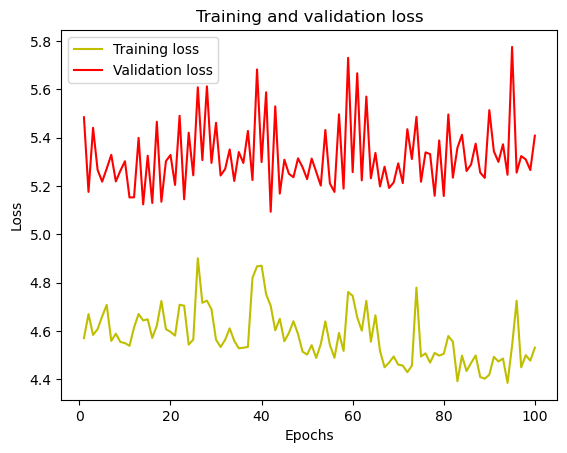

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()